In [1]:

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
     

In [2]:

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv("C:/Users/lenovo/Desktop/P3/Customer Segmentation/Behaviour.csv")

In [6]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price,Unnamed: 8
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,NaN
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,NaN
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,NaN
3,41,Business,Married,Post Graduate,3,No,2200000,1200000,NaN
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               99 non-null     int64  
 1   Profession        99 non-null     object 
 2   Marrital Status   99 non-null     object 
 3   Education         99 non-null     object 
 4   No of Dependents  99 non-null     int64  
 5   Personal loan     99 non-null     object 
 6   Total Salary      99 non-null     int64  
 7   Price             99 non-null     int64  
 8   Unnamed: 8        0 non-null      float64
dtypes: float64(1), int64(4), object(4)
memory usage: 7.1+ KB


In [8]:
df.describe()

,Age,No of Dependents,Total Salary,Price,Unnamed: 8
count,99.000000,99.000000,9.900000e+01,9.900000e+01,0.0
mean,36.313131,2.181818,2.270707e+06,1.194040e+06,NaN
std,6.246054,1.335265,1.050777e+06,4.376955e+05,NaN
min,26.000000,0.000000,2.000000e+05,1.100000e+05,NaN
25%,31.000000,2.000000,1.550000e+06,8.000000e+05,NaN
50%,36.000000,2.000000,2.100000e+06,1.200000e+06,NaN
75%,41.000000,3.000000,2.700000e+06,1.500000e+06,NaN
max,51.000000,4.000000,5.200000e+06,3.000000e+06,NaN


In [9]:
df.rename(columns={'Marrital Status':'Marital Status','Personal loan':'Car_Loan','Price':'EV_Price'},inplace=True)
df.head()

,Age,Profession,Marital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,Unnamed: 8
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,NaN
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,NaN
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,NaN
3,41,Business,Married,Post Graduate,3,No,2200000,1200000,NaN
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000,NaN


In [10]:
cat_cols = df.select_dtypes(include = 'object').columns
num_cols = df.select_dtypes(include = 'int').columns

cat_cols,num_cols

(Index(['Profession', 'Marital Status', 'Education', 'Car_Loan'], dtype='object'),
 Index(['Age', 'No of Dependents', 'Total Salary', 'EV_Price'], dtype='object'))

## Univariate Analysis:
## Categorical Variables

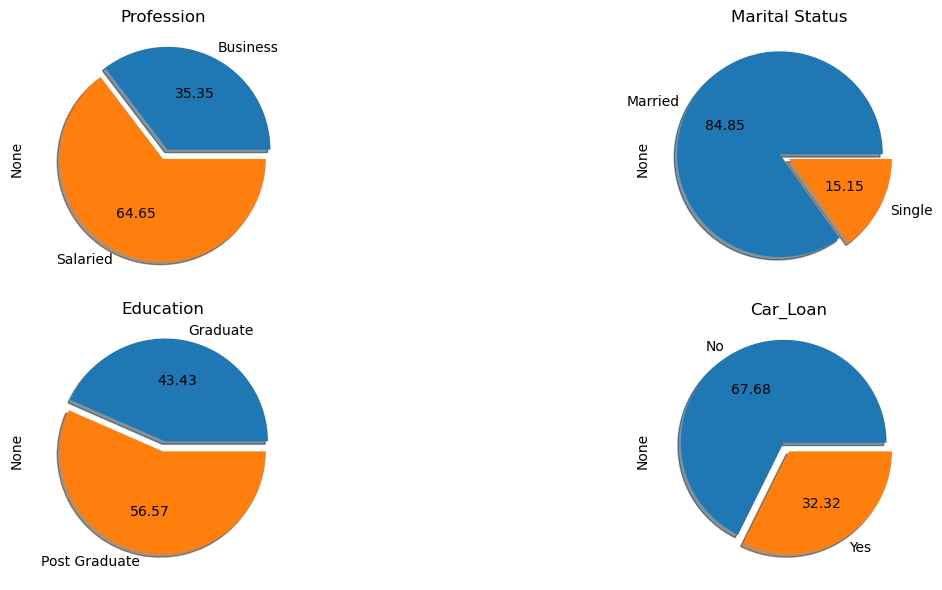

In [11]:
plt.figure(figsize = (15,6))
for i in range(len(cat_cols)):
  plt.subplot(len(cat_cols)//2,2,i+1)
  df.groupby(cat_cols[i]).size().plot(kind='pie', autopct='%.2f',shadow = True,explode = [0.1,0])
  plt.title(cat_cols[i])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

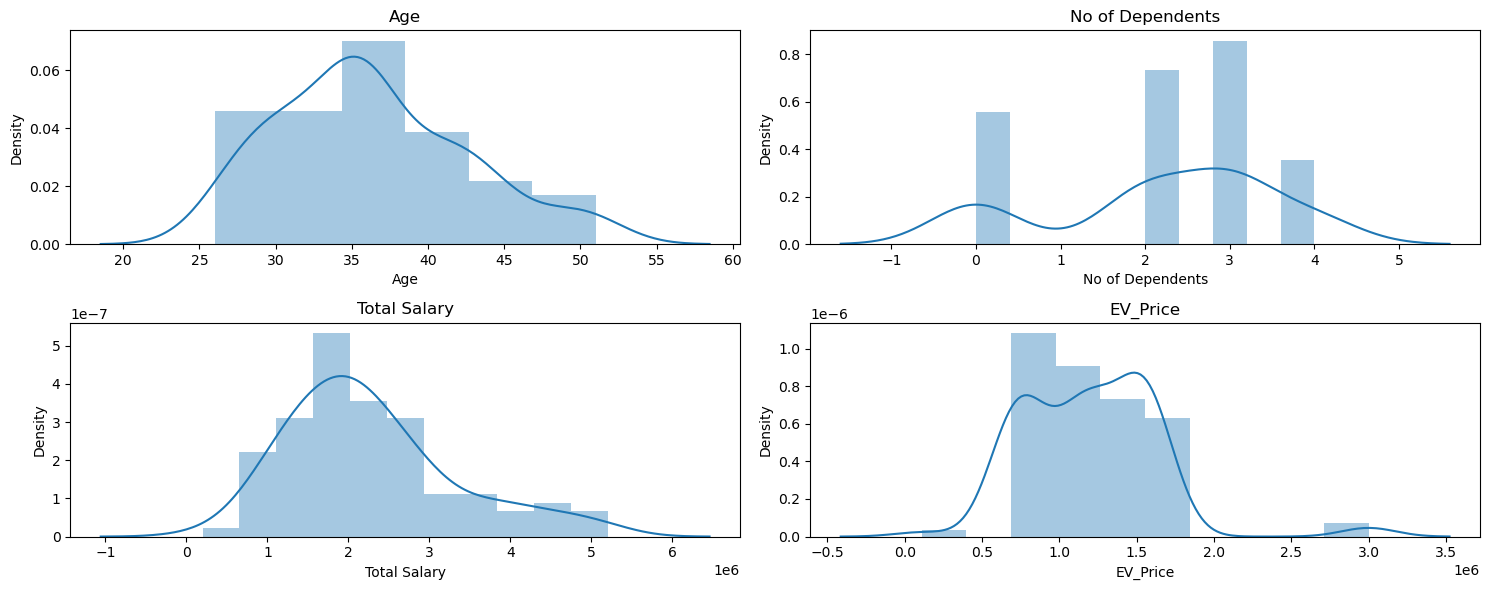

In [12]:
plt.figure(figsize = (15,6))
for i in range(len(num_cols)):
  plt.subplot(len(num_cols)//2,2,i+1)
  sns.distplot(df[num_cols[i]])
  plt.title(num_cols[i])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

## Bivariate & Multi-Variate Analysis

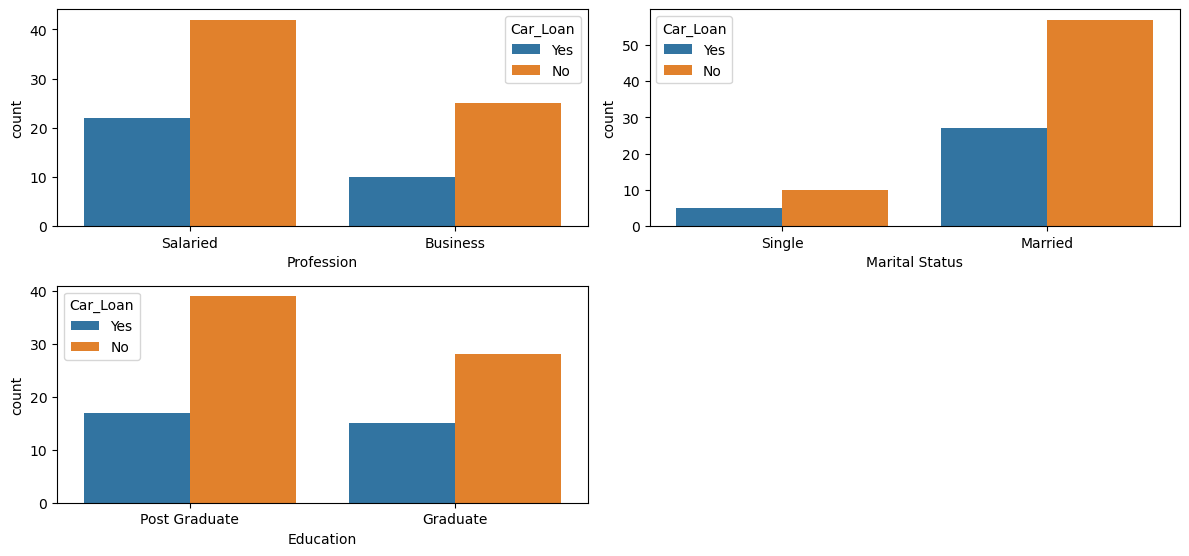

In [14]:
plt.figure(figsize = (12,8))
for i in range(len(cat_cols[:-1])):
  plt.subplot(3,2,i+1)
  sns.countplot(data = df,x = cat_cols[i],hue = 'Car_Loan')
plt.tight_layout()
plt.show()

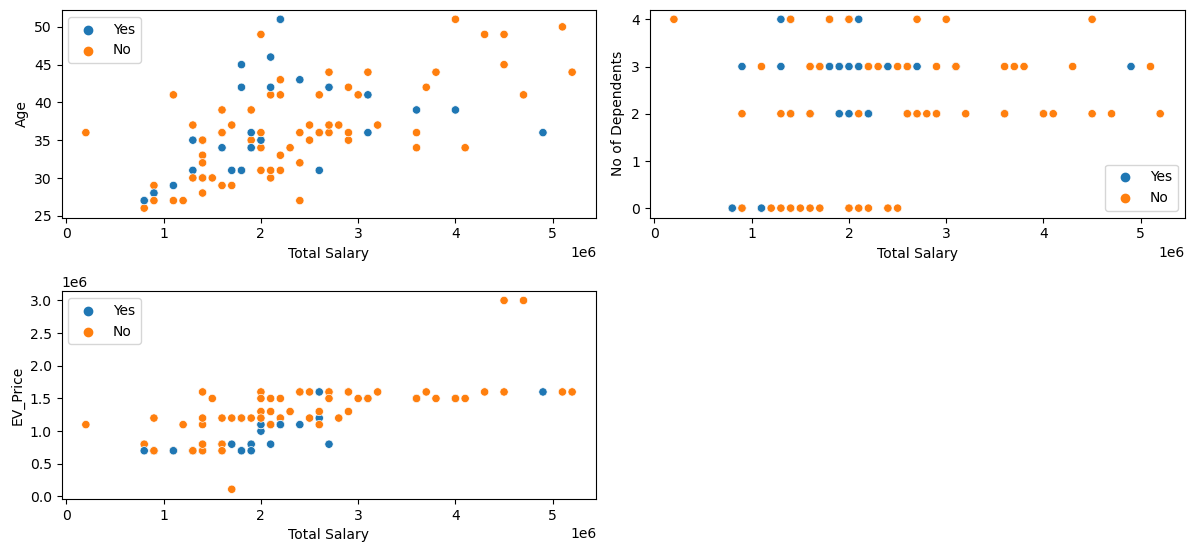

In [15]:

plt.figure(figsize = (12,8))
plt.subplot(3,2,1)
sns.scatterplot(data = df,x = 'Total Salary',y = 'Age',hue = 'Car_Loan')
plt.legend(loc = 'best')
plt.subplot(3,2,2)
sns.scatterplot(data = df,x = 'Total Salary',y = 'No of Dependents',hue = 'Car_Loan')
plt.legend(loc = 'lower right')
plt.subplot(3,2,3)
sns.scatterplot(data = df,x = 'Total Salary',y = 'EV_Price',hue = 'Car_Loan')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

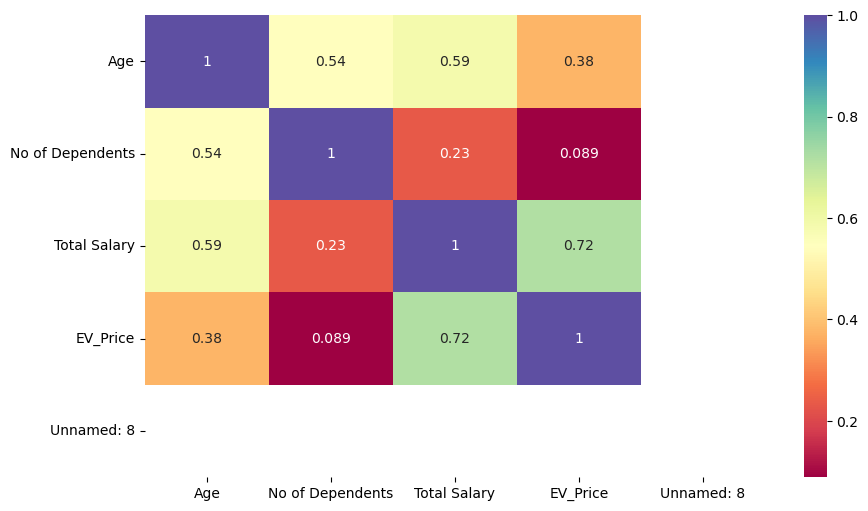

In [16]:

plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True,cmap = 'Spectral')
plt.show()

## Behavioral Analysis

In [17]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

In [18]:
df.head(3)

,Age,Profession,Marital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price,Unnamed: 8
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,NaN
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,NaN
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,NaN


In [19]:
# cl_feat = df.columns.tolist()
cl_data = df.values

In [26]:
cl_data[:,0] = cl_data[:,0].astype(float)
cl_data[:,4] = cl_data[:,4].astype(float)
cl_data[:,6] = cl_data[:,6].astype(float)
cl_data[:,7] = cl_data[:,7].astype(float)

In [27]:
cl_data[:3]

array([[27.0, 'Salaried', 'Single', 'Post Graduate', 0.0, 'Yes',
        800000.0, 800000.0, nan],
       [35.0, 'Salaried', 'Married', 'Post Graduate', 2.0, 'Yes',
        2000000.0, 1000000.0, nan],
       [45.0, 'Business', 'Married', 'Graduate', 4.0, 'Yes', 1800000.0,
        1200000.0, nan]], dtype=object)

According to the scree plot of the cost function above, we consider choosing the number of cluster k = 3. It will be the optimal number of clusters for K-Prototype cluster analysis.